# Installation

In this tutorial we show how to install OpenSBT and execute a dummy AEB system in a simplified simulator.

The installation has been tested with Ubuntu 22.04 and Python 3.8. It is recommended having installed git.

Using git we first download the OpenSBT repo. When you want to install OpenSBT independent of this tutorial, you need first to open a terminal in the folder where you want to install OpenSBT and clone the repository via (the "!" is only required if statement is executed in this jupyter notebook)


In [1]:
!git clone https://git.fortiss.org/opensbt/opensbt-core.git

Cloning into 'opensbt-core'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 2097 (delta 144), reused 0 (delta 0), pack-reused 1817
Receiving objects: 100% (2097/2097), 98.09 MiB | 3.17 MiB/s, done.
Resolving deltas: 100% (1153/1153), done.


Now you need to switch to the OpenSBT folder via:

In [2]:
cd opensbt-core

/home/sorokin/Projects/testing/OpenSBT/opensbt-core/doc/jupyter/opensbt-core


Then install all dependencies of OpenSBT with the following commands (installation might take some seconds, as libraries need to be downloaded).


In [3]:
!pip install -r requirements.txt 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


## Testing Installation

We can now test the installation of OpenSBT by running our first experiment: Testing a simplified Automated Emergency Braking system in avoiding a collision with a pedestrian. The experiment is already define in OpenSBT and has the name "5". Note, that this is a very simplified system and is only for explaining the usage of OpenSBT.

_Note: Only linear motion planning, no comprehensive vehicles dynamics or environmental simulation is used. This system is just for testing the installation of OpenSBT._

First we need to reload the logging modules, otherwise we will see no logging outputs. (Only in jupyter environment required)

In [4]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

Then we start the experiment:

In [5]:
!python run.py -e 5

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      2 |             - |             -
     2 |      100 |      3 |  0.0074207844 |             f
     3 |      150 |      4 |  0.2088018204 |         ideal
     4 |      200 |      4 |  0.0358031113 |             f
     5 |      250 |      7 |  0.0030396888 |         ideal
     6 |      300 |      5 |  0.1480625423 |         ideal
     7 |      350 |      9 |  0.0518578613 |         ideal
     8 |      400 |      6 |  0.0222547988 |         nadir
     9 |      450 |      8 |  0.0850767382 |         ideal
    10 |      500 |     11 |  0.4383022813 |         nadir


We can now inspect the created result artefacts which are located in the results folder whose path is written in the bottom of the output. We load them in the jupyter notebook:

In [6]:
import pandas as pd
from pathlib import Path
import os

exp_folder = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/"
paths = sorted(Path(exp_folder).iterdir(), key=os.path.getmtime)
results_path = str(paths[-1])
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

   Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0      0        83.033458      1.547067       237.850427      2.738438   
1      1        83.033458      1.547067       237.850427      2.738438   

   Fitness_Min distance  Fitness_Velocity at min distance  
0              0.166189                         -1.547067  
1              0.166189                         -1.547067  


In [7]:
import pandas as pd
import os
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

   Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0      0        83.033458      1.547067       237.850427      2.738438   
1      1        83.033458      1.547067       237.850427      2.738438   

   Fitness_Min distance  Fitness_Velocity at min distance  
0              0.166189                         -1.547067  
1              0.166189                         -1.547067  


Further, we can inspect the visualization of the scenarios (yellow: ego vehicle, red: pedestrian)  

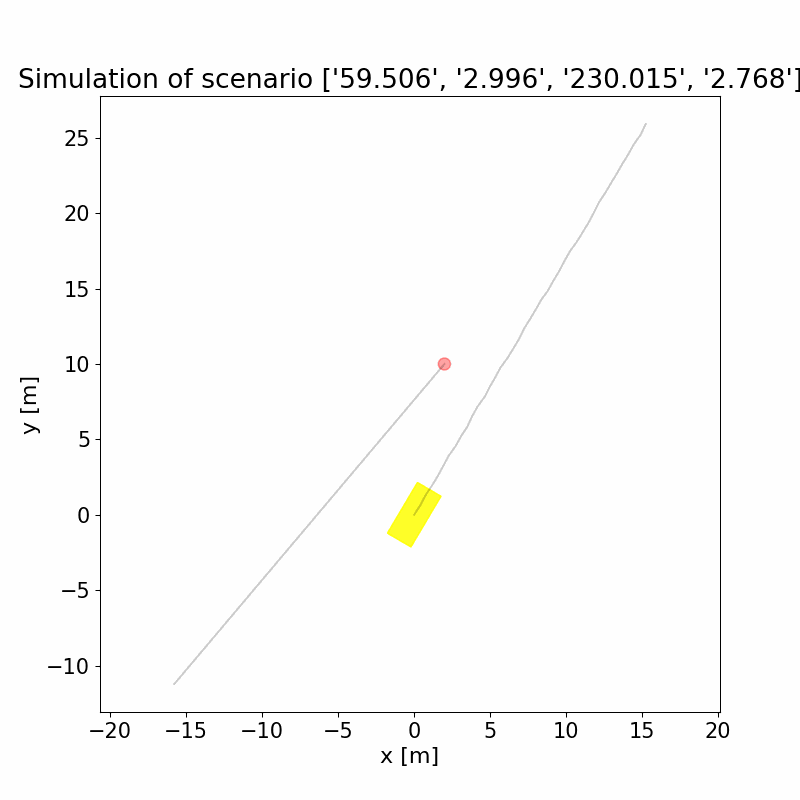

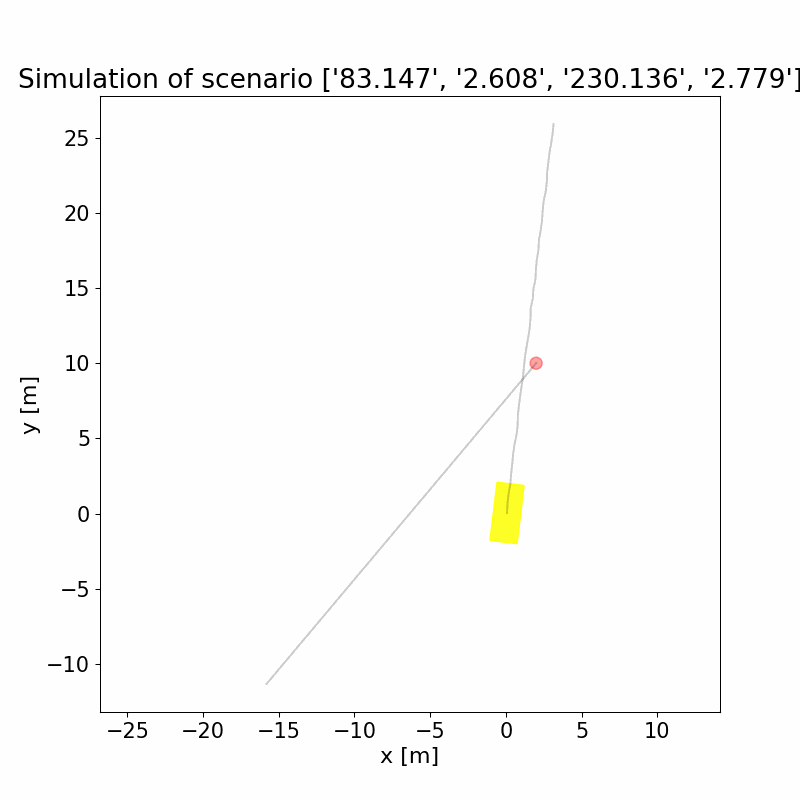

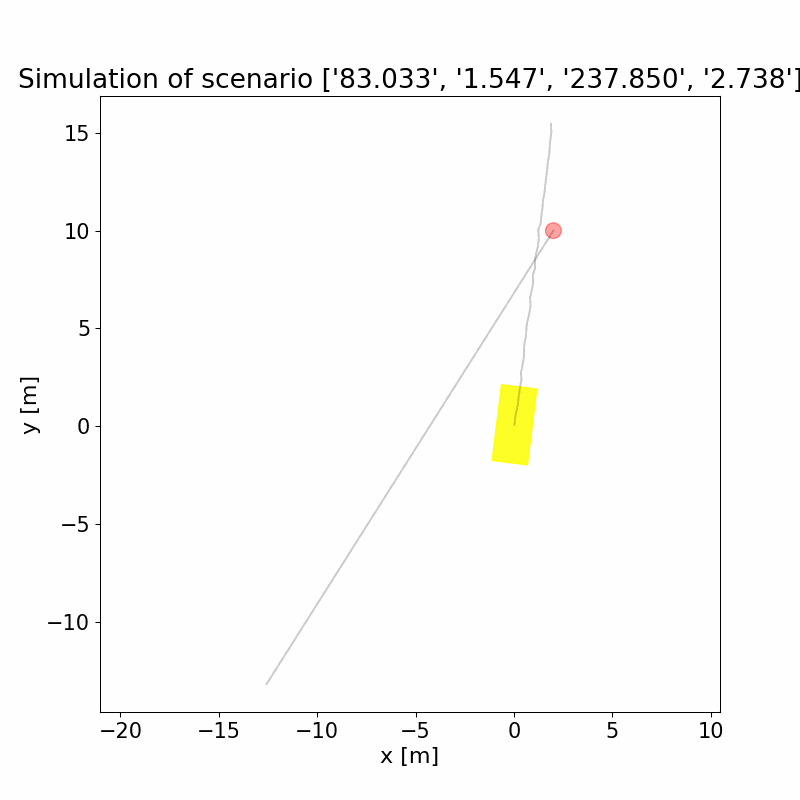

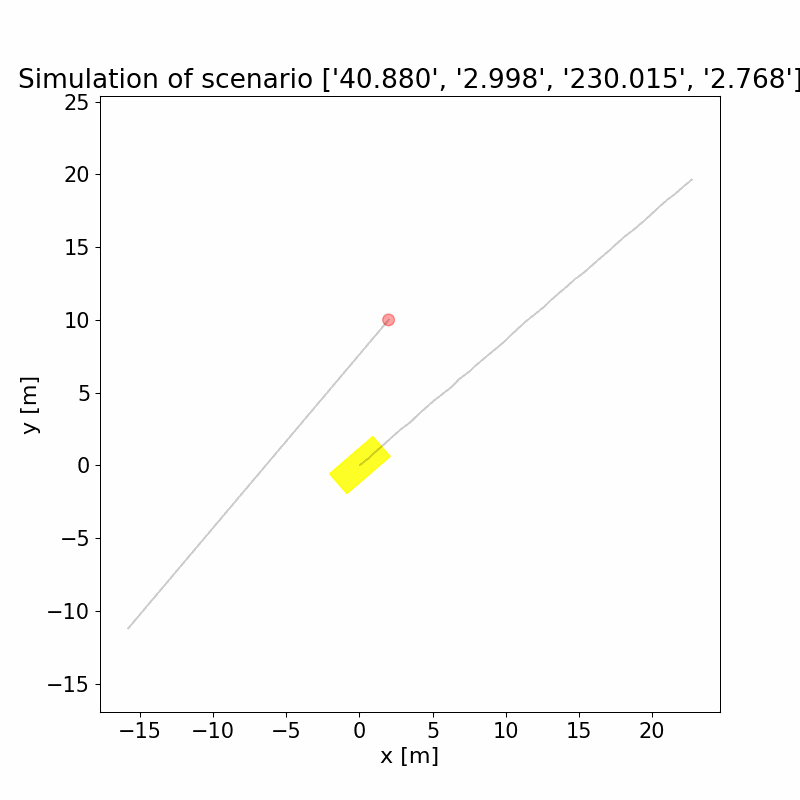

In [8]:
from IPython.display import Image
import os
n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

Also we can inspect pair-wise test input space plots which are generated for all test cases encountered during search. Purple boxes depict intervals in the search space where the SUT is assumed to be critical. These regions are identified by Decision Tree learning. 
    

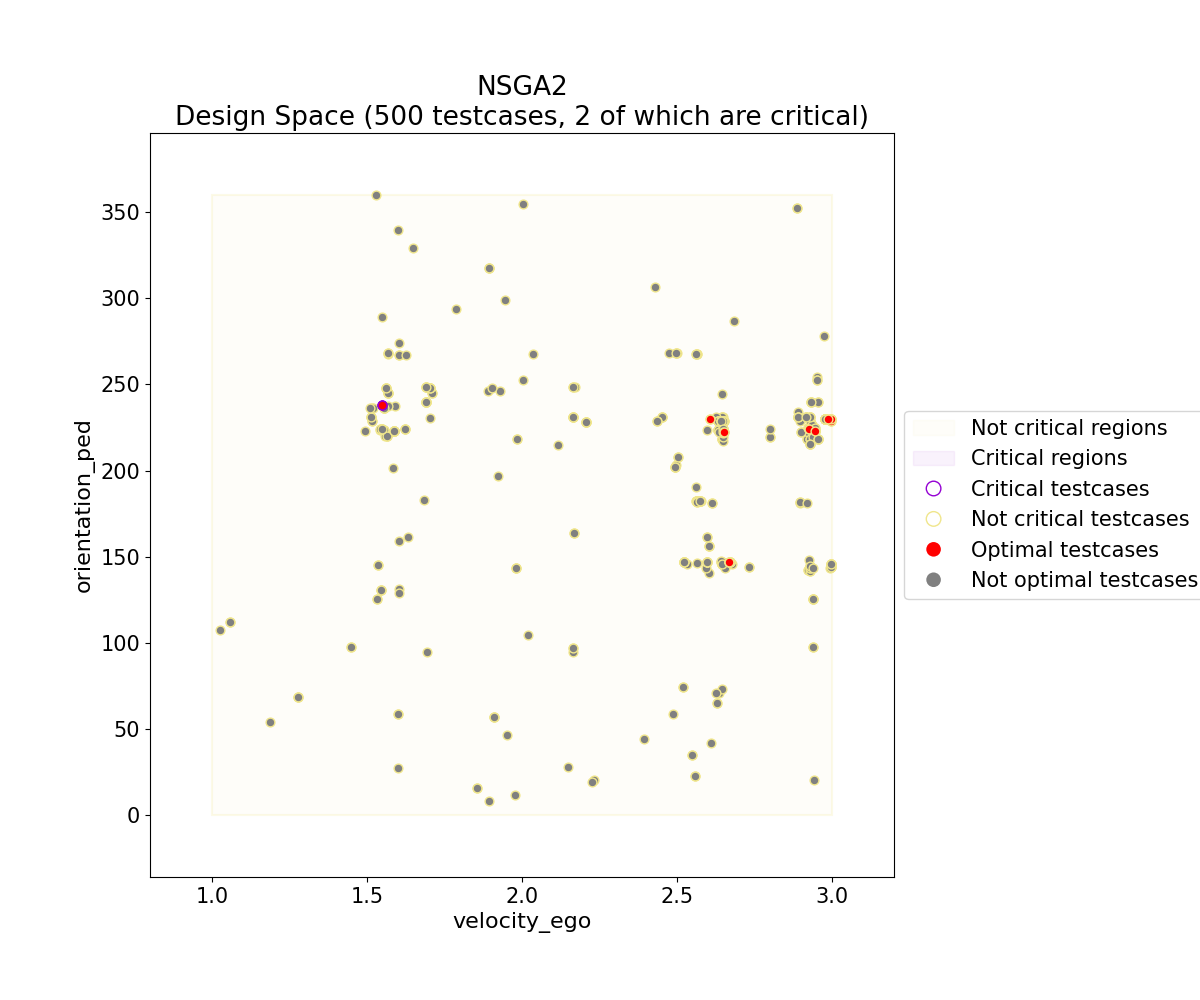

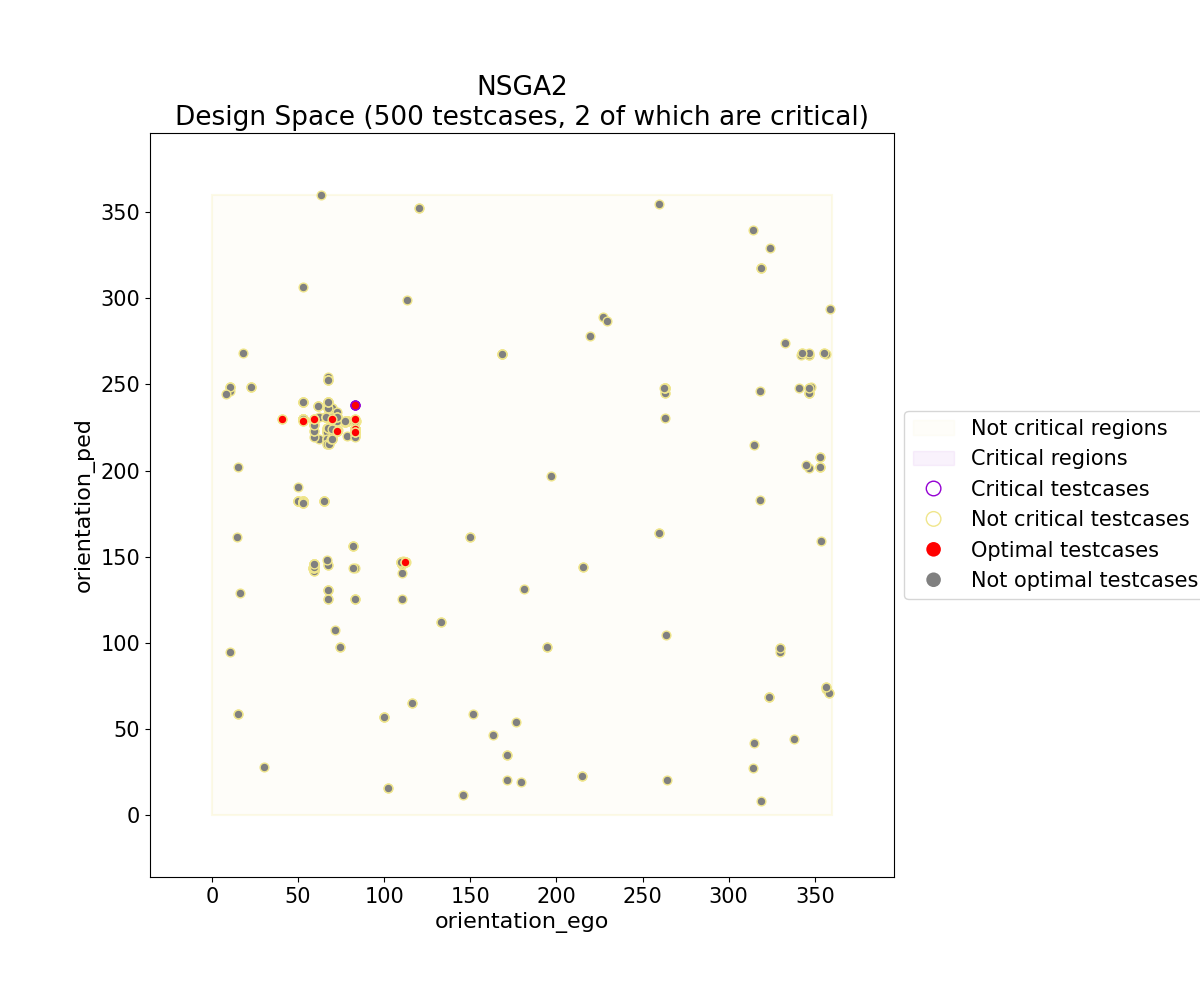

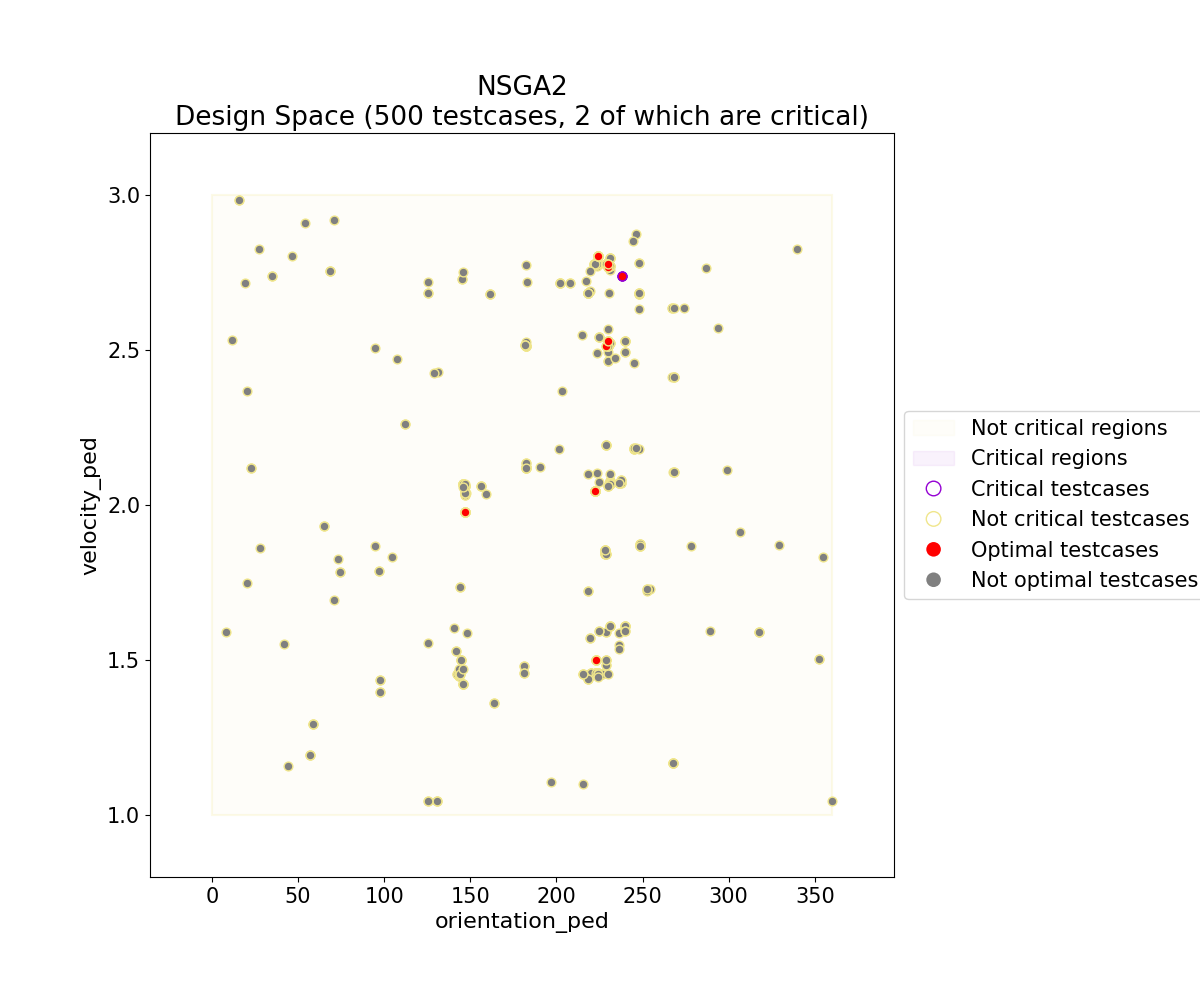

In [9]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "design_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1

Also plots are generated visualizing fitness values of all evaluated test inputs:


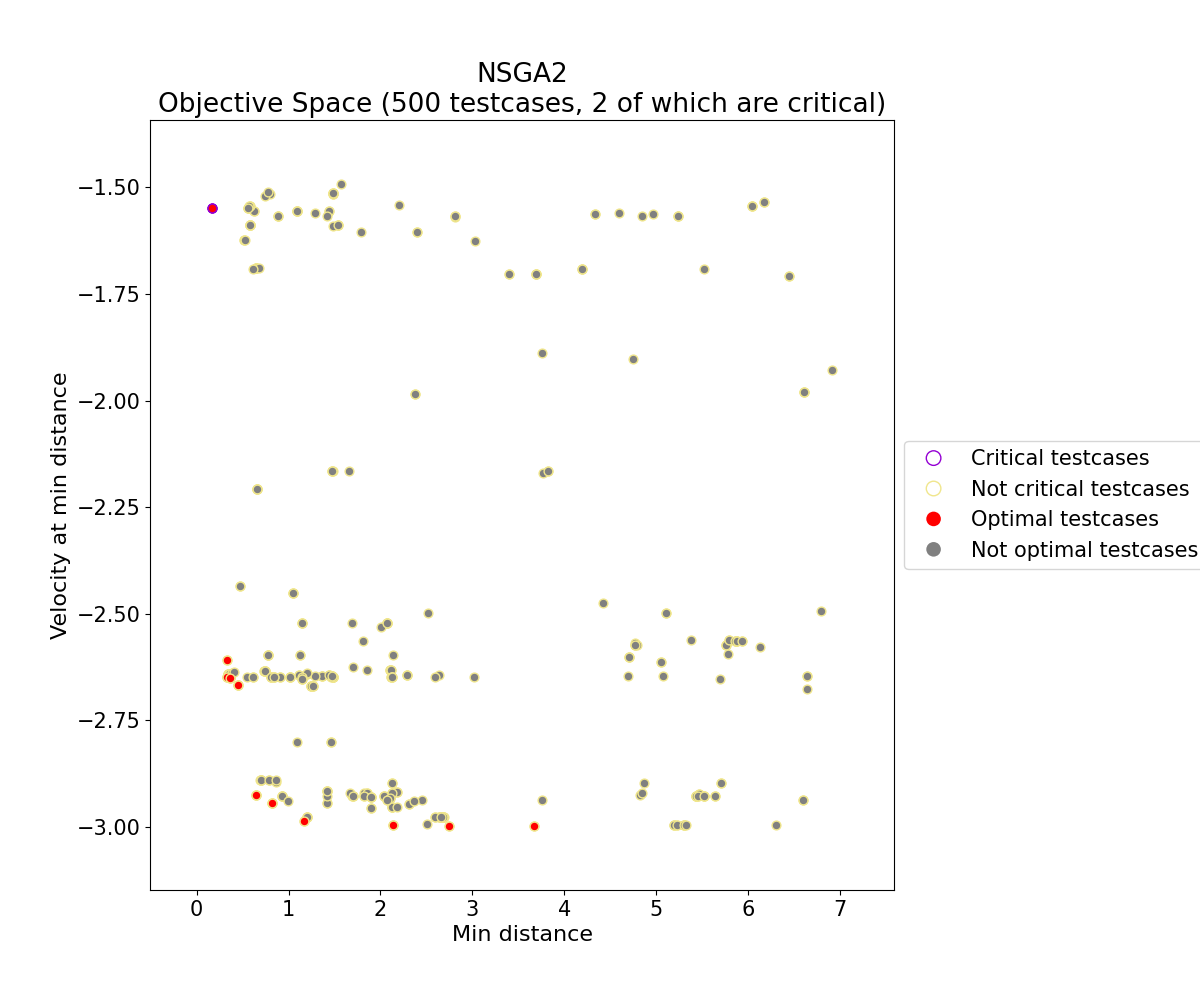

In [10]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "objective_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1    

**Note: In the fitness space plot the velocity is negative as the corresponding fitness functions are inverted and minimized internally by pymoo.**